# Code alongs - Pandas

In [4]:
import pandas as pd 

# dict
data = {"INKÖP": 25, "OPA":29, "JS":27}

series = pd.Series(data)

series



INKÖP    25
OPA      29
JS       27
dtype: int64

In [6]:
# indexing using iloc
series.iloc[0], series.iloc[-1]

(25, 27)

In [8]:
series.keys()

Index(['INKÖP', 'OPA', 'JS'], dtype='object')

In [9]:
series["OPA"]

29

## DataFrames

In [10]:
# df for dataframe
df_programs = pd.DataFrame(series, columns=["Number students"])
df_programs

,Number students
INKÖP,25
OPA,29
JS,27


In [11]:
df_programs["Number students"]

INKÖP    25
OPA      29
JS       27
Name: Number students, dtype: int64

In [14]:
df_programs = pd.DataFrame(
    {"Students": [25, 30, 30, 27], "Language": ["Python", "C#", "Kotlin", "Java"]},
    index=["AI", ".NET", "APP", "Java"],
)

df_programs

,Students,Language
AI,25,Python
.NET,30,C#
APP,30,Kotlin
Java,27,Java


In [15]:
df_programs.index

Index(['AI', '.NET', 'APP', 'Java'], dtype='object')

In [16]:
df_programs["Language"]

AI      Python
.NET        C#
APP     Kotlin
Java      Java
Name: Language, dtype: object

In [17]:
df_programs["Students"]

AI      25
.NET    30
APP     30
Java    27
Name: Students, dtype: int64

In [19]:
df_programs["Language"][".NET"]

'C#'

### Filtering with mask

In [21]:
# find all programs with less than 28 students
# mask -> boolean series
df_programs["Students"] < 28


AI       True
.NET    False
APP     False
Java     True
Name: Students, dtype: bool

In [22]:
df_programs[df_programs["Students"] < 28]

,Students,Language
AI,25,Python
Java,27,Java


## Read from excel

In [27]:
import pandas as pd 
df = pd.read_excel("../data/data_processing/calories.xlsx")
df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [26]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


## EDA - Exploratory data analysis

In [29]:
# to get general information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [31]:
# (rows, cols)
df.shape

(2225, 5)

In [35]:
# works better with numerical values - now we have objects
df.describe().T

,count,unique,top,freq
FoodCategory,2225,44,BakingIngredients,95
FoodItem,2225,1993,Roast Beef,4
per100grams,2225,2,100g,1802
Cals_per100grams,2225,524,100 cal,26
KJ_per100grams,2225,524,420 kJ,26


In [36]:
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [39]:
df["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [40]:
df["FoodCategory"].value_counts()

FoodCategory
BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds     

In [41]:
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [43]:
# we have both solids and liquids
df["per100grams"].value_counts()

per100grams
100g     1802
100ml     423
Name: count, dtype: int64

## Data cleaning

- all data types are object
- convert to int in order to do calculations
- separate liquids and solids

In [45]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [57]:
df["Calories"] = df["Cals_per100grams"].str[:-3].astype(int)
df["Calories"]

0        62
1        48
2        92
3        88
4        54
       ... 
2220    617
2221    233
2222    717
2223    180
2224    286
Name: Calories, Length: 2225, dtype: int64

In [58]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams,Calories
0,CannedFruit,Applesauce,100g,62 cal,260 kJ,62
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ,88
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ,54


In [62]:
df = df.drop("Cals_per100grams", axis="columns")
df.head()

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
0,CannedFruit,Applesauce,100g,260 kJ,62
1,CannedFruit,Canned Apricots,100g,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,370 kJ,88
4,CannedFruit,Canned Cherries,100g,227 kJ,54


### Divide into liquids and solids

In [63]:
df["per100grams"].value_counts()

per100grams
100g     1802
100ml     423
Name: count, dtype: int64

In [68]:
solids = df[df["per100grams"] == "100g"].reset_index(drop=True)
solids

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
0,CannedFruit,Applesauce,100g,260 kJ,62
1,CannedFruit,Canned Apricots,100g,202 kJ,48
2,CannedFruit,Canned Blackberries,100g,386 kJ,92
3,CannedFruit,Canned Blueberries,100g,370 kJ,88
4,CannedFruit,Canned Cherries,100g,227 kJ,54
...,...,...,...,...,...
1797,Spreads,Sunflower Butter,100g,2591 kJ,617
1798,Spreads,Tapenade,100g,979 kJ,233
1799,Spreads,Unsalted Butter,100g,3011 kJ,717
1800,Spreads,Vegemite,100g,756 kJ,180


In [71]:
liquids = df[df["per100grams"] == "100ml"].reset_index(drop=True)
liquids

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
0,Milk&DairyProducts,Almond Milk,100ml,71 kJ,17
1,Milk&DairyProducts,Buttermilk,100ml,260 kJ,62
2,Milk&DairyProducts,Coconut Milk,100ml,966 kJ,230
3,Milk&DairyProducts,Hot Chocolate,100ml,374 kJ,89
4,Milk&DairyProducts,Kefir,100ml,231 kJ,55
...,...,...,...,...,...
418,Sauces&Dressings,Soy Sauce,100ml,281 kJ,67
419,Sauces&Dressings,Vinaigrette,100ml,504 kJ,120
420,Sauces&Dressings,Worcestershire Sauce,100ml,328 kJ,78
421,Sauces&Dressings,Yogurt Dressing,100ml,189 kJ,45


In [77]:
solids.head(2)

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
0,CannedFruit,Applesauce,100g,260 kJ,62
1,CannedFruit,Canned Apricots,100g,202 kJ,48


## Find top 5 categories of highest calories

In [81]:
solids.sort_values(by="Calories", ascending=False).head()

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
1295,Soups,Goulash,100g,4238 kJ,1009
1424,Oils&Fats,Lard,100g,3788 kJ,902
513,Beef&Veal,Beef Tallow,100g,3788 kJ,902
1422,Oils&Fats,Goose Fat,100g,3772 kJ,898
584,Meat,Chicken Fat,100g,3772 kJ,898


In [83]:
solids_top5 = solids.sort_values(by="Calories", ascending=False).iloc[:5]
solids_top5

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
1295,Soups,Goulash,100g,4238 kJ,1009
1424,Oils&Fats,Lard,100g,3788 kJ,902
513,Beef&Veal,Beef Tallow,100g,3788 kJ,902
1422,Oils&Fats,Goose Fat,100g,3772 kJ,898
584,Meat,Chicken Fat,100g,3772 kJ,898


In [84]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5

,FoodCategory,FoodItem,per100grams,KJ_per100grams,Calories
330,Oils&Fats,Cod Liver Oil,100ml,4200 kJ,1000
381,VegetableOils,Wheat Germ Oil,100ml,3902 kJ,929
373,VegetableOils,Salmon Oil,100ml,3826 kJ,911
362,VegetableOils,Menhaden Oil,100ml,3826 kJ,911
336,Oils&Fats,Herring Oil,100ml,3788 kJ,902


### Top 5 per category

In [97]:
top5_categories = df.groupby("FoodCategory")["Calories"].median().sort_values(
    ascending=False
).reset_index().head()

top5_categories

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


## Plot top5 

/var/folders/3s/7mxc35_16j71s8tnrxvhfg4m0000gn/T/ipykernel_3611/2159334055.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/3s/7mxc35_16j71s8tnrxvhfg4m0000gn/T/ipykernel_3611/2159334055.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/3s/7mxc35_16j71s8tnrxvhfg4m0000gn/T/ipykernel_3611/2159334055.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


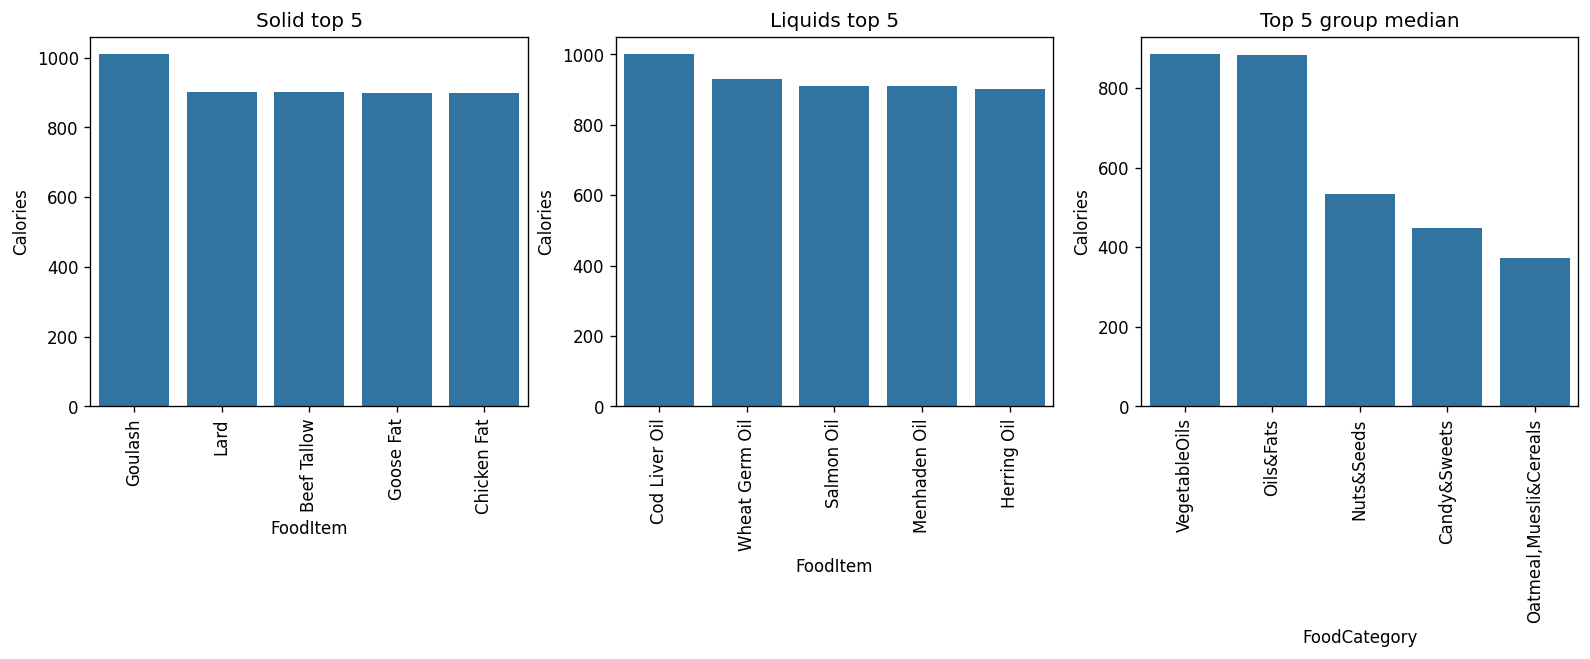

In [103]:
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, axes = plt.subplots(1,3, dpi=120, figsize=(16,4))
dfs = [solids_top5, liquids_top5, top5_categories]
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]
titles = ["Solid top 5", "Liquids top 5", "Top 5 group median"]

for ax, data, title, x_column in zip(axes, dfs, titles, x_columns):
    sns.barplot(data, x=x_column, y="Calories", ax = ax)
    ax.set(title = title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

